In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the CSV file
base_dir = os.path.dirname(os.path.abspath(""))
filename = "GEMM_benchmarks.csv"
filepath = os.path.join(base_dir, "docs_sphinx", "_static", "resources", "report_25_05_15", filename)
filepath

's:\\Github\\machine-learning-compilers\\docs_sphinx\\_static\\resources\\report_25_05_15\\BR_GEMM_benchmarks.csv'

In [5]:
df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20480 entries, 0 to 20479
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   m            20480 non-null  int64  
 1   n            20480 non-null  int64  
 2   k            20480 non-null  int64  
 3   br_size      20480 non-null  int64  
 4   trans_a      20480 non-null  int64  
 5   trans_b      20480 non-null  int64  
 6   trans_c      20480 non-null  int64  
 7   ld_a         20480 non-null  int64  
 8   ld_b         20480 non-null  int64  
 9   ld_c         20480 non-null  int64  
 10  br_stride_a  20480 non-null  int64  
 11  br_stride_b  20480 non-null  int64  
 12  num_reps     20480 non-null  int64  
 13  time         20480 non-null  float64
dtypes: float64(1), int64(13)
memory usage: 2.2 MB


In [6]:
# Compute GFLOPS: 2 * m * n * k / (time * 1e9)
df['GFLOPS'] = 2 * df['m'] * df['n'] * df['k'] * df['br_size'] * df['num_reps'] / (df['time'] * 1e9)
df

,m,n,k,br_size,trans_a,trans_b,trans_c,ld_a,ld_b,ld_c,br_stride_a,br_stride_b,num_reps,time,GFLOPS
0,1,1,1,16,0,0,0,1,1,1,0,0,14966542,0.701713,0.682515
1,1,1,16,16,0,0,0,1,1,1,0,0,2665152,0.701620,1.944867
2,1,1,32,16,0,0,0,1,1,1,0,0,1420579,0.702069,2.071981
3,1,1,64,16,0,0,0,1,1,1,0,0,734353,0.702259,2.141596
4,1,1,128,16,0,0,0,1,1,1,0,0,373496,0.702472,2.177793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,64,64,1,16,0,0,0,64,64,64,0,0,209318,0.697454,39.336989
20476,64,64,16,16,0,0,0,64,64,64,0,0,37592,0.701636,112.360410
20477,64,64,32,16,0,0,0,64,64,64,0,0,19955,0.701362,119.335443
20478,64,64,64,16,0,0,0,64,64,64,0,0,10155,0.702099,121.330863


In [8]:
df['GFLOPS'].mean()

78.69907053890307

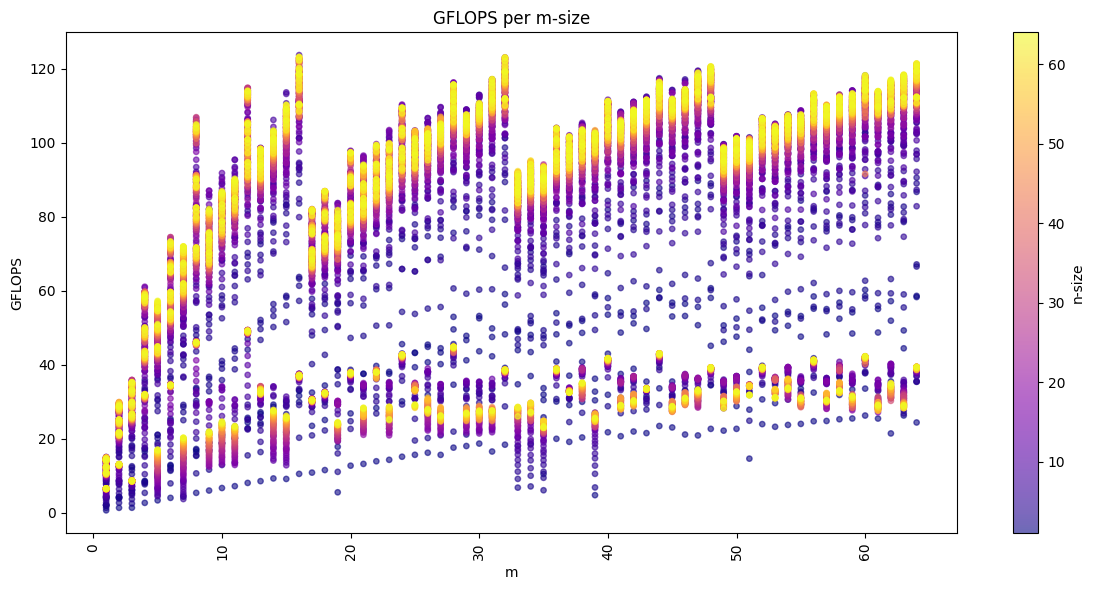

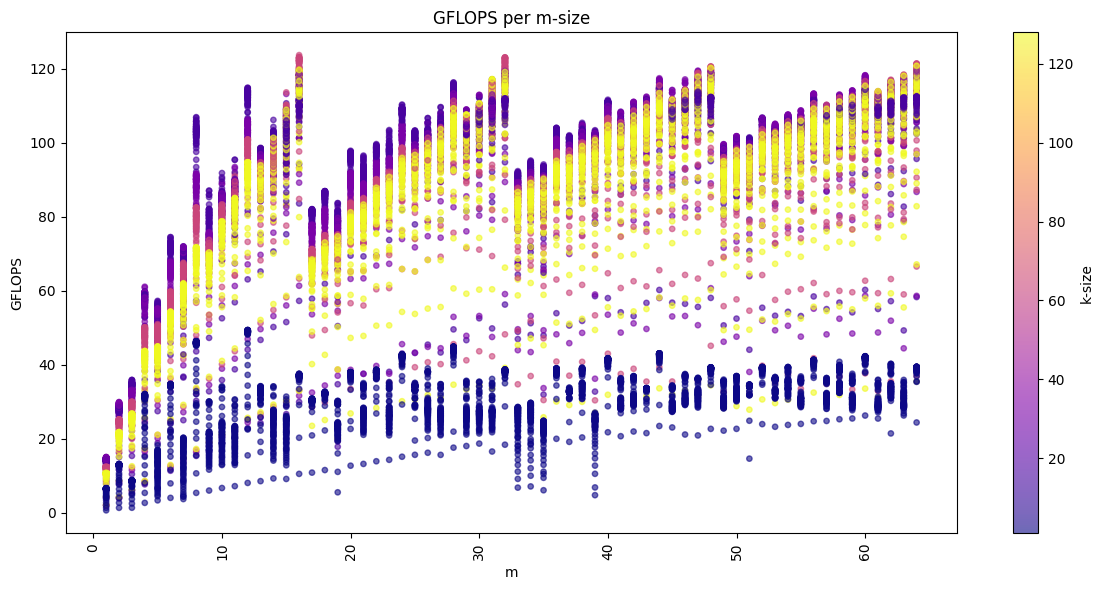

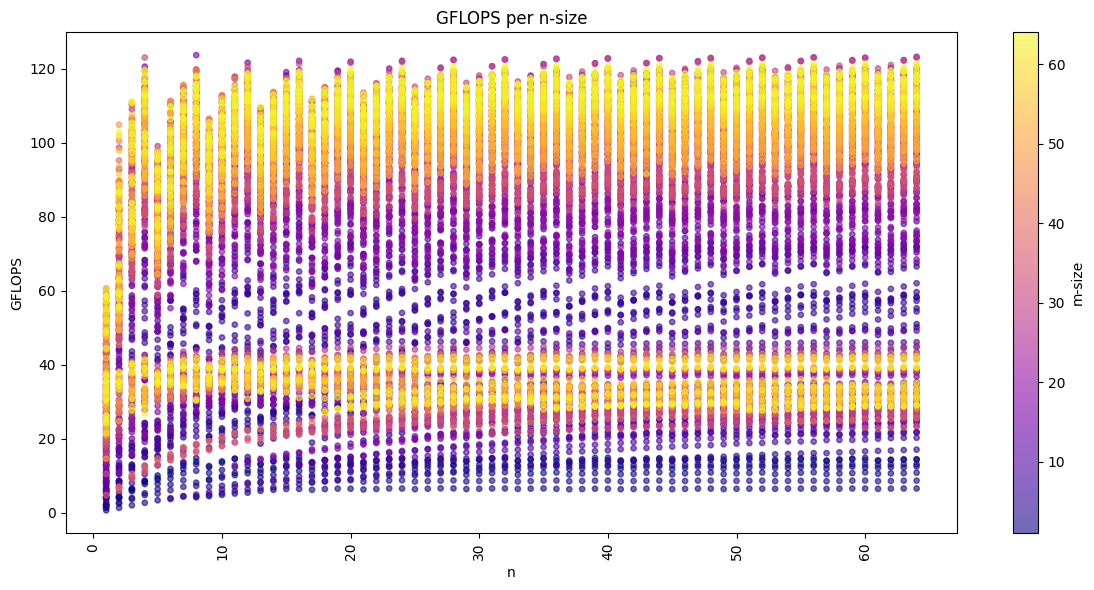

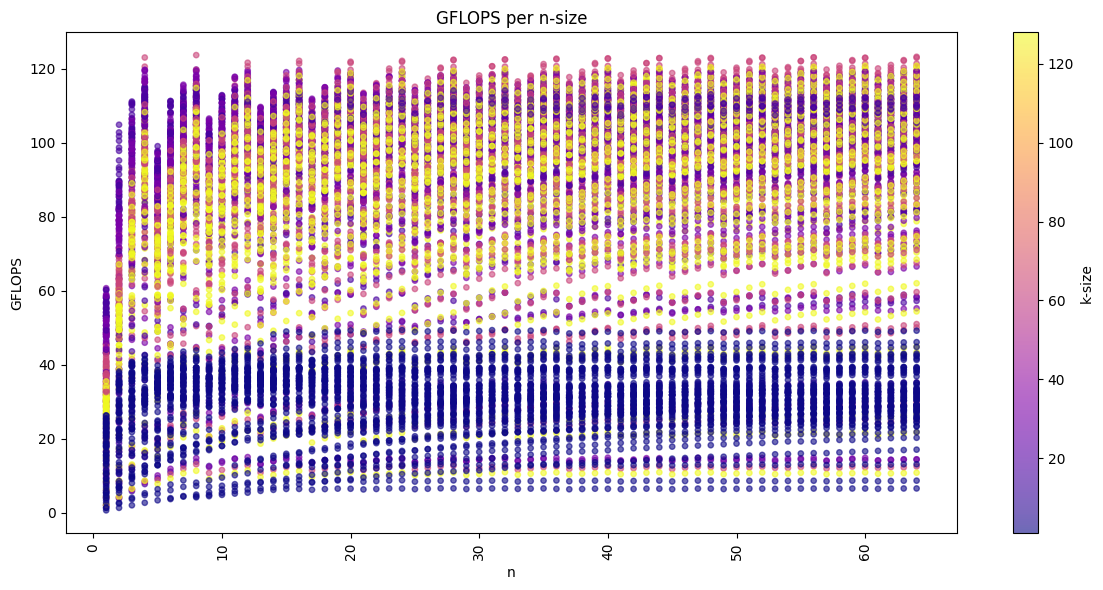

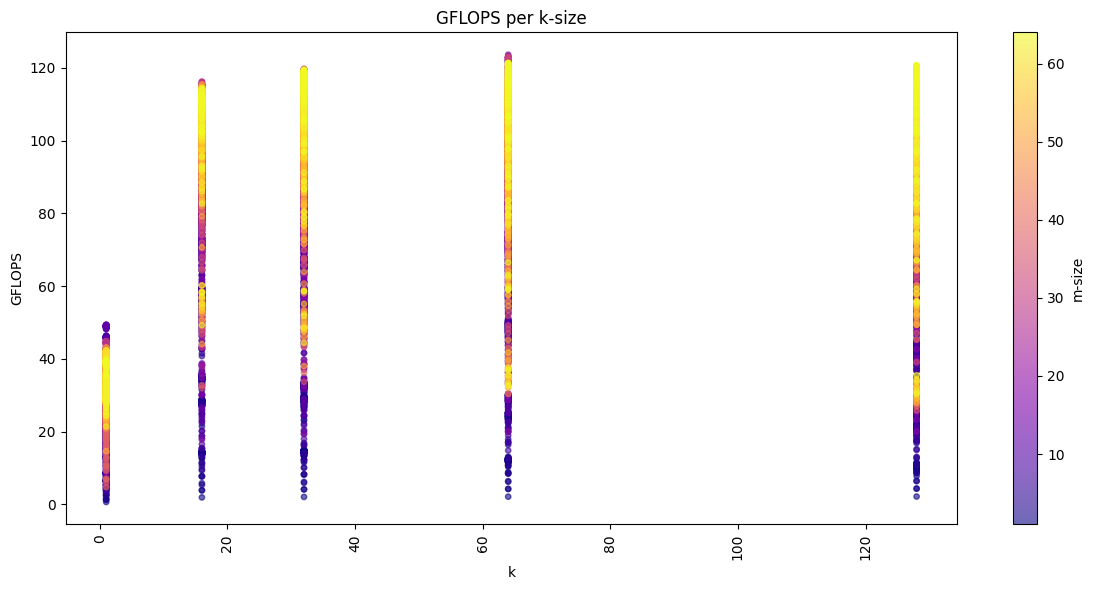

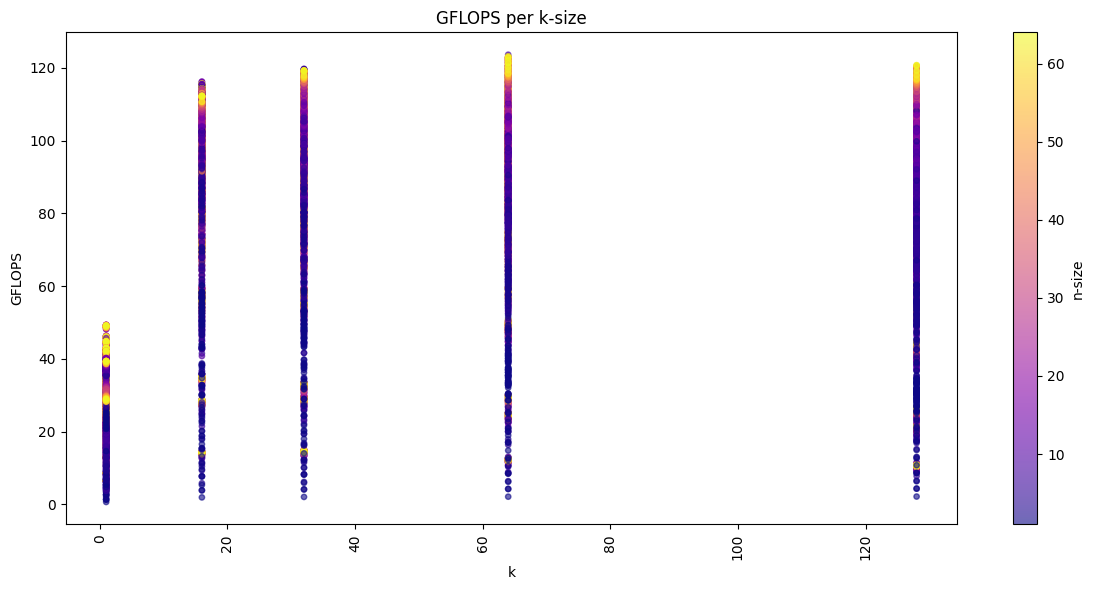

In [ ]:
for label in ['m', 'n', 'k']:
    unused_dims = [x for x in ['m', 'n', 'k'] if x != label]
    for unused in unused_dims:
        # Plot
        plt.figure(figsize=(12, 6))
        scatter = plt.scatter(df[label], df['GFLOPS'], marker='o', c=df[unused], cmap='plasma', alpha=0.6, s=15)
        cbar = plt.colorbar(scatter)
        cbar.set_label(f'{unused}-size')
        plt.xlabel(label)
        plt.ylabel('GFLOPS')
        plt.title(f'GFLOPS per {label}-size')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f"BR_GEMM_plot_{label}_color_{unused}.png")